In [2]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib as plot # type: ignore

In [3]:
df_store = df = pd.read_csv("data/deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
# different types of extras

df['extras_type'].value_counts()

extras_type
wides      7651
legbyes    3778
noballs    1000
byes        628
penalty       2
Name: count, dtype: int64

In [5]:
# bowler who has bowled most balls in ipl

round(df['bowler'].value_counts().tail(10))

bowler
Aman Hakim Khan    6
RS Gavaskar        6
RA Shaikh          6
AM Rahane          6
D Brevis           3
SN Khan            2
SPD Smith          2
DA Warner          2
AC Gilchrist       1
YBK Jaiswal        1
Name: count, dtype: int64

In [6]:
# Assuming df is your DataFrame with columns 'batter' and 'non_striker'

# Count the number of balls faced by each batter
batter_counts = df['batter'].value_counts()

# Count the number of balls faced by each non-striker
non_striker_counts = df['non_striker'].value_counts()

# Sum the counts of balls faced by each player
total_balls_faced = batter_counts.add(non_striker_counts, fill_value=0)

total_balls_faced.sort_values(ascending=False).head()

V Kohli      11296.0
S Dhawan     11194.0
RG Sharma     9824.0
DA Warner     9257.0
SK Raina      8486.0
Name: count, dtype: float64

In [7]:
# most balls in an over

max_balls_index = df["ball"].idxmax()
max_balls_row = df.loc[max_balls_index]

print("Bowler with the maximum balls in an over:")
print(df[(df["match_id"] == 1359479) & (df['over'] == 18)]['extras_type'])

Bowler with the maximum balls in an over:
227030      NaN
227031      NaN
227032    wides
227033    wides
227034    wides
227035    wides
227036      NaN
227037      NaN
227038    wides
227039      NaN
227040      NaN
Name: extras_type, dtype: object


In [8]:
# different types of dismisal in ipl

df['dismissal_kind'].value_counts()

dismissal_kind
caught                   7437
bowled                   2089
run out                  1062
lbw                       750
caught and bowled         349
stumped                   345
retired hurt               15
hit wicket                 15
retired out                 3
obstructing the field       2
Name: count, dtype: int64

In [9]:
# most dismissed batsman

df["player_dismissed"].value_counts().head()

player_dismissed
RG Sharma     210
V Kohli       195
S Dhawan      188
RV Uthappa    180
KD Karthik    175
Name: count, dtype: int64

In [10]:
# Filter the DataFrame based on the condition
wides_df = df[df['extras_type'] == 'wides']

# Group by the bowler and count the number of wides bowled by each bowler
bowler_wides_count = wides_df.groupby('bowler').size()

# Find the bowler who has bowled the most wides
most_wides_bowler = bowler_wides_count.idxmax()
most_wides_count = bowler_wides_count.max()

print(f"The bowler who has bowled the most wides is {most_wides_bowler} with {most_wides_count} wides.")


The bowler who has bowled the most wides is DJ Bravo with 167 wides.


In [11]:
# Filter the DataFrame based on the condition
noballs_df = df[df['extras_type'] == 'noballs']

# Group by the bowler and count the number of wides bowled by each bowler
bowler_noballs_count = noballs_df.groupby('bowler').size()

bowler_noballs_count.sort_values(ascending=False).head()

bowler
JJ Bumrah      29
UT Yadav       23
S Sreesanth    23
I Sharma       22
A Mishra       21
dtype: int64

In [12]:
df[df["dismissal_kind"] == "hit wicket"].head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
2358,335991,2,Mumbai Indians,Kings XI Punjab,17,2,MA Khote,S Sreesanth,DS Kulkarni,0,0,0,NaN,1,MA Khote,hit wicket,NaN
8031,336016,1,Royal Challengers Bangalore,Kings XI Punjab,4,6,Misbah-ul-Haq,S Sreesanth,V Kohli,0,0,0,NaN,1,Misbah-ul-Haq,hit wicket,NaN
18029,392202,2,Rajasthan Royals,Chennai Super Kings,5,3,SA Asnodkar,JA Morkel,RJ Quiney,0,0,0,NaN,1,SA Asnodkar,hit wicket,NaN
59825,548311,1,Chennai Super Kings,Deccan Chargers,17,2,RA Jadeja,DW Steyn,DJ Bravo,0,0,0,NaN,1,RA Jadeja,hit wicket,NaN
72773,548367,1,Royal Challengers Bangalore,Mumbai Indians,6,3,SS Tiwary,Harbhajan Singh,TM Dilshan,0,0,0,NaN,1,SS Tiwary,hit wicket,NaN


In [13]:
df[df['dismissal_kind'] == 'bowled']['bowler'].value_counts().head()

bowler
SL Malinga    63
PP Chawla     48
SP Narine     46
RA Jadeja     39
B Kumar       38
Name: count, dtype: int64

In [14]:
df[df["dismissal_kind"] == "caught and bowled"]["bowler"].value_counts().head()

bowler
Harbhajan Singh    11
DJ Bravo           11
SP Narine           8
RA Jadeja           7
Kuldeep Yadav       7
Name: count, dtype: int64

## Highest scorer against each team

In [15]:
# Assuming df is your DataFrame
# Replace 'batter' and 'batting_team' with your actual column names

# Get unique batters and teams
uniq_batters = df["batter"].unique()
uniq_teams = df["batting_team"].unique()

# Create a pivot table to calculate the total runs scored by each batter against each team
runs_matrix = pd.pivot_table(
    df, values="batsman_runs", index="batter", columns="bowling_team", aggfunc="sum"
)

# Fill missing values with 0
runs_matrix = runs_matrix.fillna(0)

# Reorder columns to match uniq_teams order
runs_matrix = runs_matrix.reindex(columns=uniq_teams)
# Assuming runs_matrix is your DataFrame containing the runs matrix

# Define the width for formatting
team_width = max(len(team) for team in runs_matrix.columns) + 5
batsman_width = max(len(batsman) for batsman in runs_matrix.index) + 5

# Iterate through each team
for team in runs_matrix.columns:
    # Get the name of the batsman who has scored the maximum runs against the current team
    max_runs_batsman = runs_matrix.loc[runs_matrix[team].idxmax()].name
    # Get the maximum runs scored against the current team
    max_runs = runs_matrix.loc[runs_matrix[team].idxmax()][team]

    # Format and print the output
    team_output = f"Team: {team.ljust(team_width)}"
    batsman_output = f"Batsman: {max_runs_batsman.ljust(batsman_width)}"
    runs_output = f"Runs Scored: {str(max_runs)}"

    print(team_output + batsman_output + runs_output)

Team: Kolkata Knight Riders           Batsman: DA Warner                   Runs Scored: 1075.0
Team: Royal Challengers Bangalore     Batsman: DA Warner                   Runs Scored: 861.0
Team: Chennai Super Kings             Batsman: S Dhawan                    Runs Scored: 1057.0
Team: Kings XI Punjab                 Batsman: DA Warner                   Runs Scored: 906.0
Team: Rajasthan Royals                Batsman: S Dhawan                    Runs Scored: 679.0
Team: Delhi Daredevils                Batsman: V Kohli                     Runs Scored: 761.0
Team: Mumbai Indians                  Batsman: S Dhawan                    Runs Scored: 901.0
Team: Deccan Chargers                 Batsman: R Dravid                    Runs Scored: 339.0
Team: Kochi Tuskers Kerala            Batsman: SR Tendulkar                Runs Scored: 100.0
Team: Pune Warriors                   Batsman: CH Gayle                    Runs Scored: 383.0
Team: Sunrisers Hyderabad             Batsman: SV Samson  

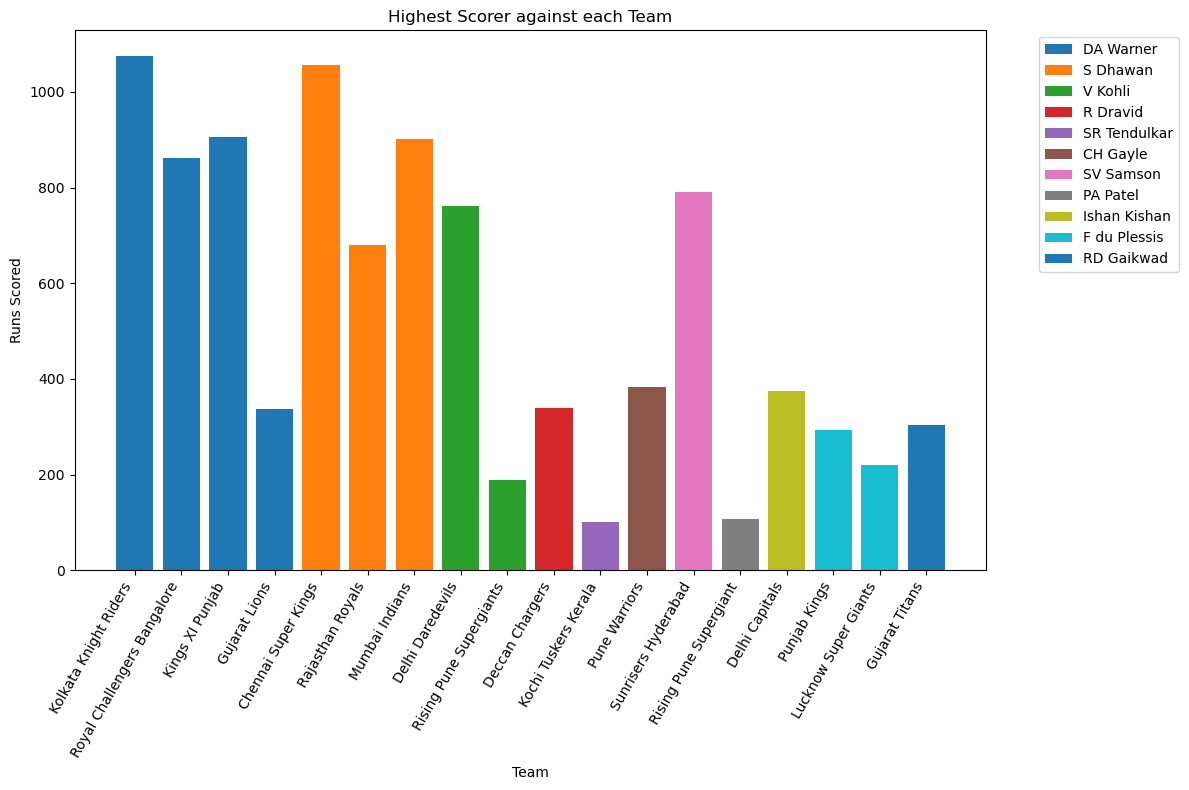

In [16]:

# Provided data
data = {
    "Team": [
        "Kolkata Knight Riders",
        "Royal Challengers Bangalore",
        "Chennai Super Kings",
        "Kings XI Punjab",
        "Rajasthan Royals",
        "Delhi Daredevils",
        "Mumbai Indians",
        "Deccan Chargers",
        "Kochi Tuskers Kerala",
        "Pune Warriors",
        "Sunrisers Hyderabad",
        "Rising Pune Supergiants",
        "Gujarat Lions",
        "Rising Pune Supergiant",
        "Delhi Capitals",
        "Punjab Kings",
        "Lucknow Super Giants",
        "Gujarat Titans",
    ],
    "Batsman": [
        "DA Warner",
        "DA Warner",
        "S Dhawan",
        "DA Warner",
        "S Dhawan",
        "V Kohli",
        "S Dhawan",
        "R Dravid",
        "SR Tendulkar",
        "CH Gayle",
        "SV Samson",
        "V Kohli",
        "DA Warner",
        "PA Patel",
        "Ishan Kishan",
        "F du Plessis",
        "F du Plessis",
        "RD Gaikwad",
    ],
    "Runs_Scored": [
        1075.0,
        861.0,
        1057.0,
        906.0,
        679.0,
        761.0,
        901.0,
        339.0,
        100.0,
        383.0,
        791.0,
        188.0,
        336.0,
        108.0,
        374.0,
        294.0,
        219.0,
        304.0,
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the runs scored by each batsman against each team
for batsman in df["Batsman"].unique():
    runs_data = df[df["Batsman"] == batsman]
    plt.bar(runs_data["Team"], runs_data["Runs_Scored"], label=batsman)

# Adding labels and title
plt.xlabel("Team")
plt.ylabel("Runs Scored")
plt.title("Highest Scorer against each Team")
plt.xticks(rotation=60,ha = 'right')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

## Most Runouts in IPL
- Player
- Team

In [17]:
df = df_store


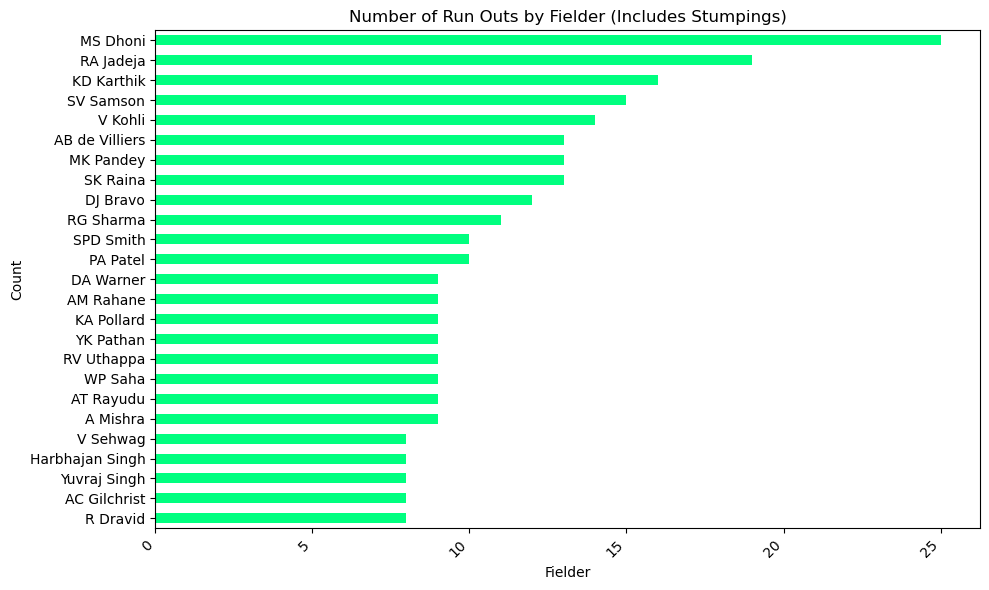

In [18]:
from matplotlib import pyplot as plt


run_out_fielder_counts = (
    df[df["dismissal_kind"] == "run out"]["fielder"].value_counts().head(25).sort_values()
)

plt.figure(figsize=(10, 6))
run_out_fielder_counts.plot(kind="barh",color='springgreen')
plt.xlabel("Fielder")
plt.ylabel("Count")
plt.title("Number of Run Outs by Fielder (Includes Stumpings)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

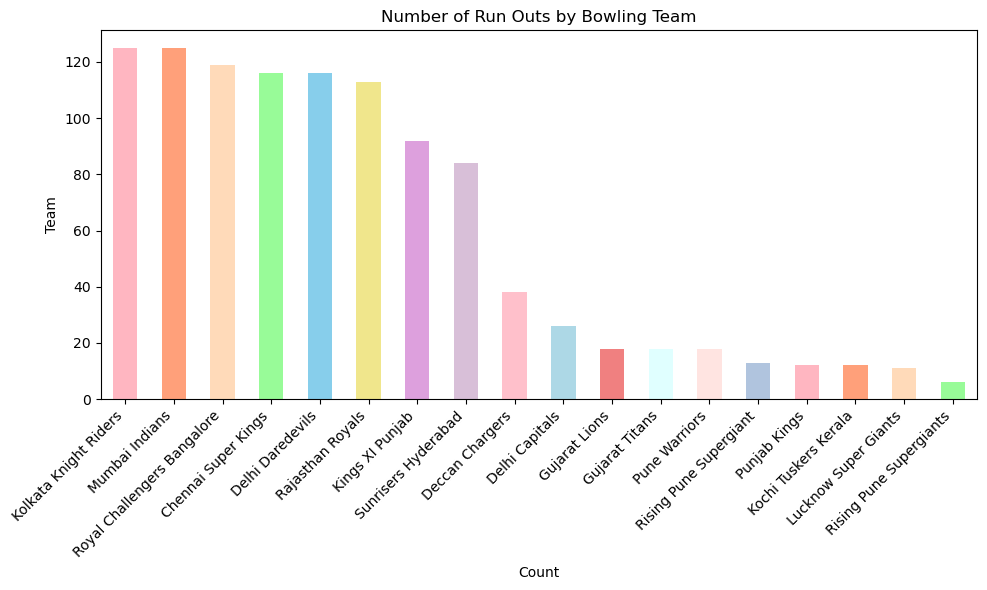

In [19]:
from matplotlib import pyplot as plt

run_out_teams_counts = (
    df[df["dismissal_kind"] == "run out"]["bowling_team"]
    .value_counts()
    .head(25)
    .sort_values(ascending=False)
)


pastel_colors = [
    "#FFB6C1",
    "#FFA07A",
    "#FFDAB9",
    "#98FB98",
    "#87CEEB",
    "#F0E68C",
    "#DDA0DD",
    "#D8BFD8",
    "#FFC0CB",
    "#ADD8E6",
    "#F08080",
    "#E0FFFF",
    "#FFE4E1",
    "#B0C4DE",
]

plt.figure(figsize=(10, 6))
run_out_teams_counts.plot(kind="bar", color=pastel_colors)
plt.xlabel("Count")
plt.ylabel("Team")
plt.title("Number of Run Outs by Bowling Team")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()